In [78]:
from utils import *
from solvers import *
from problems import *
from solvers_milan import *

import utils, solvers, problems

GRID_SIZE = 10

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Paper, Steps

In [79]:
paper = solvers.PaperWithNumbers(10)

## Generator

## Add solver example with visualization

piros színnel jelölve az attention, zöld színnel az adott lépésben változó mezők

In [80]:
def add_problem_generator(a=27, b=67):
    while True:
        yield {'a': a, 'b': b, 'c': a+b}

In [81]:
def solve_addition(a=27, b=67):
    res = next(iter(AddSolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

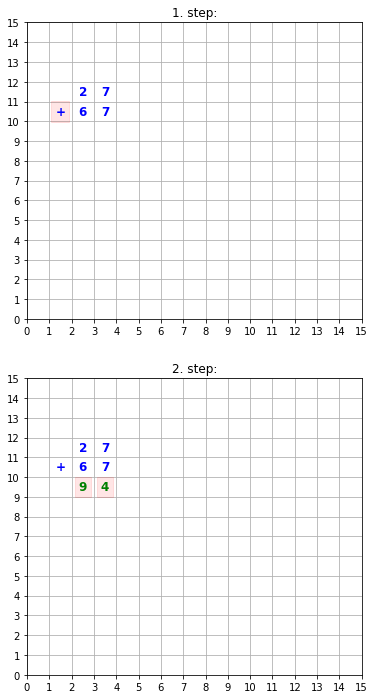

In [82]:
solve_addition()

## Is Prime (hard)

<=23 számokra "emlékezetből": nincsenek mellékszámítások.

ennél nagyobb számokra: ellenőrizzük sqrt(n)-ig az osztókat

In [83]:
def prime_generator(prime):
    while True:
        yield {'a': prime}

In [84]:
def solve_prime(n):
    res = next(iter(IsPrimeSolverHard(15).generator(prime_generator(n))))
    plot_steps(res)

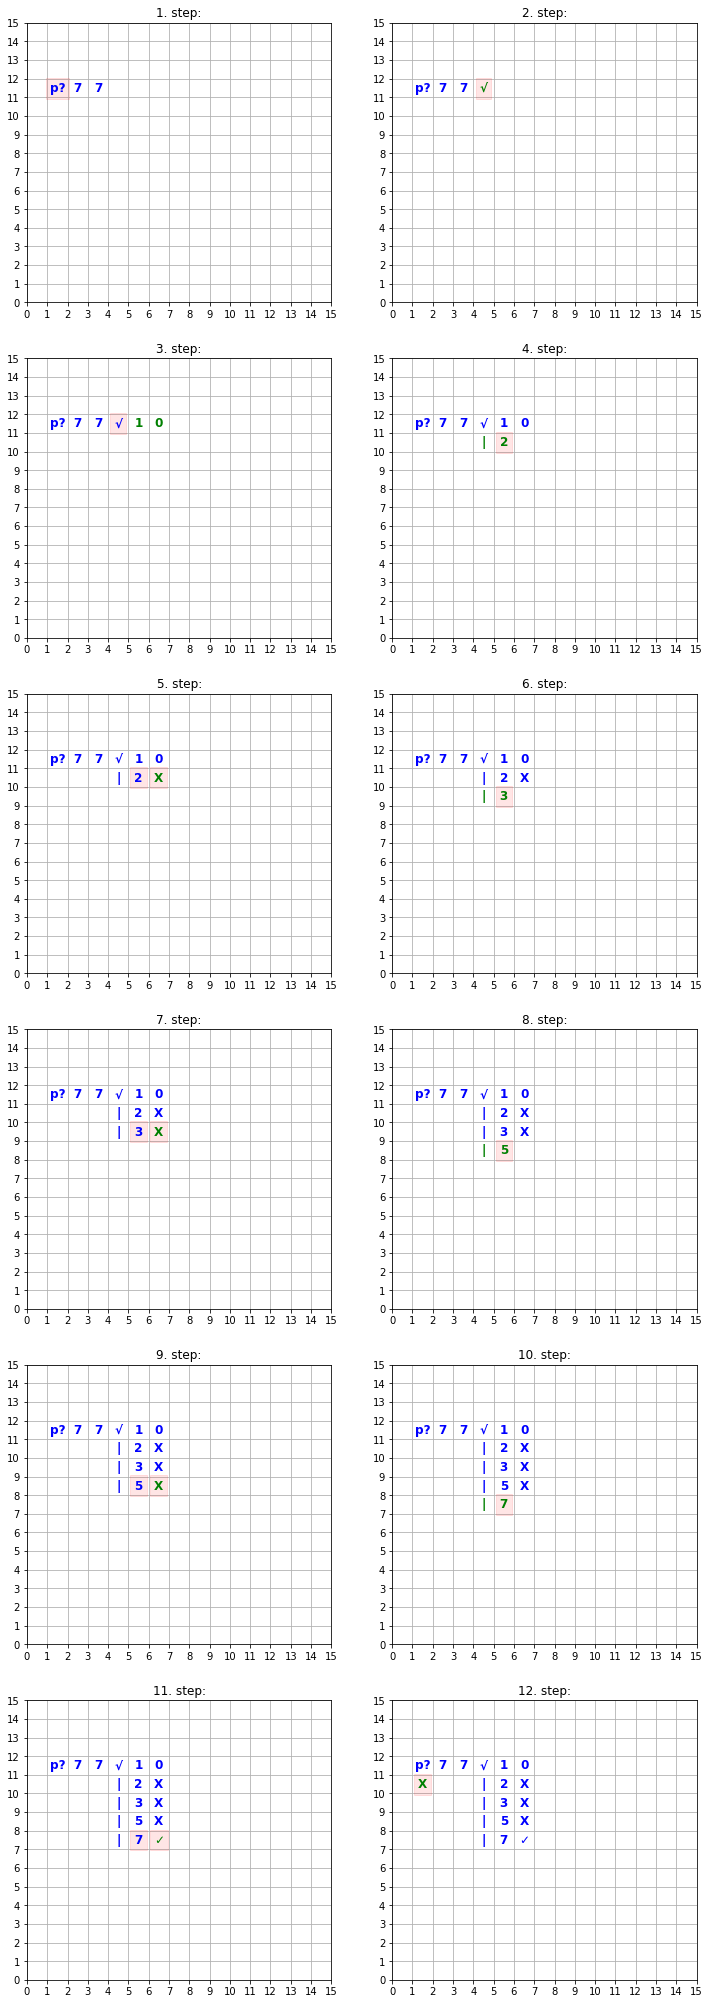

In [85]:
solve_prime(77)

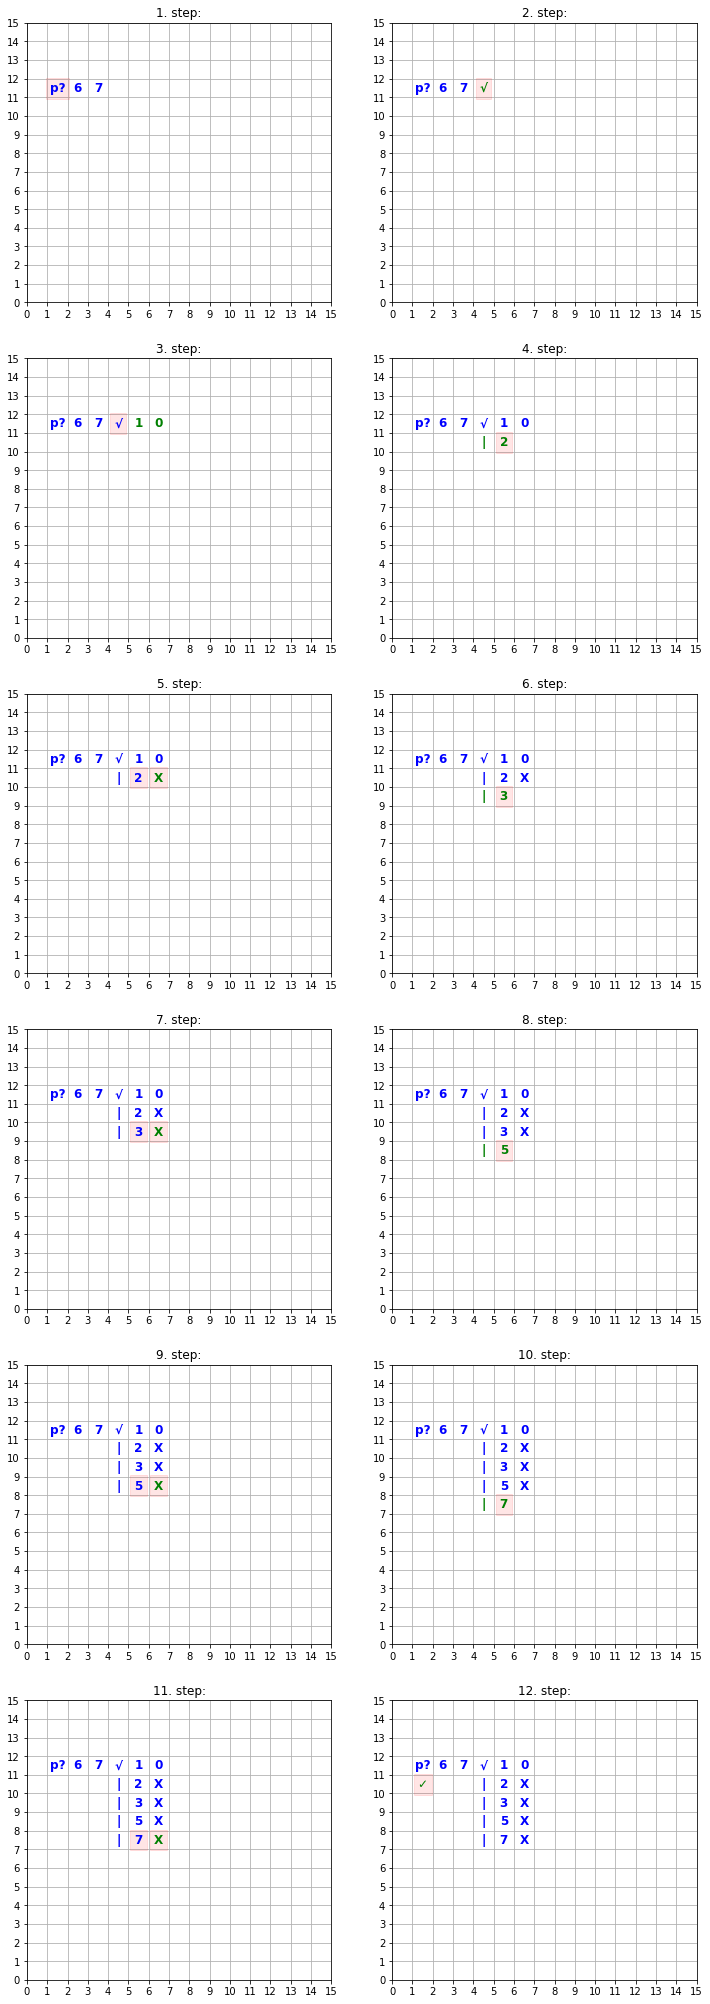

In [86]:
solve_prime(67)

# Base conversion solver

In [87]:
def bc_problem_generator(n, b1=2):
    while True:
        yield {'n': n, 'b1': b1, 'b2': 10}

In [88]:
def solve_base_conversion(n, b1):
    res = next(iter(BaseConversionSolver(15).generator(
        bc_problem_generator(n, b1))))
    plot_steps(res)


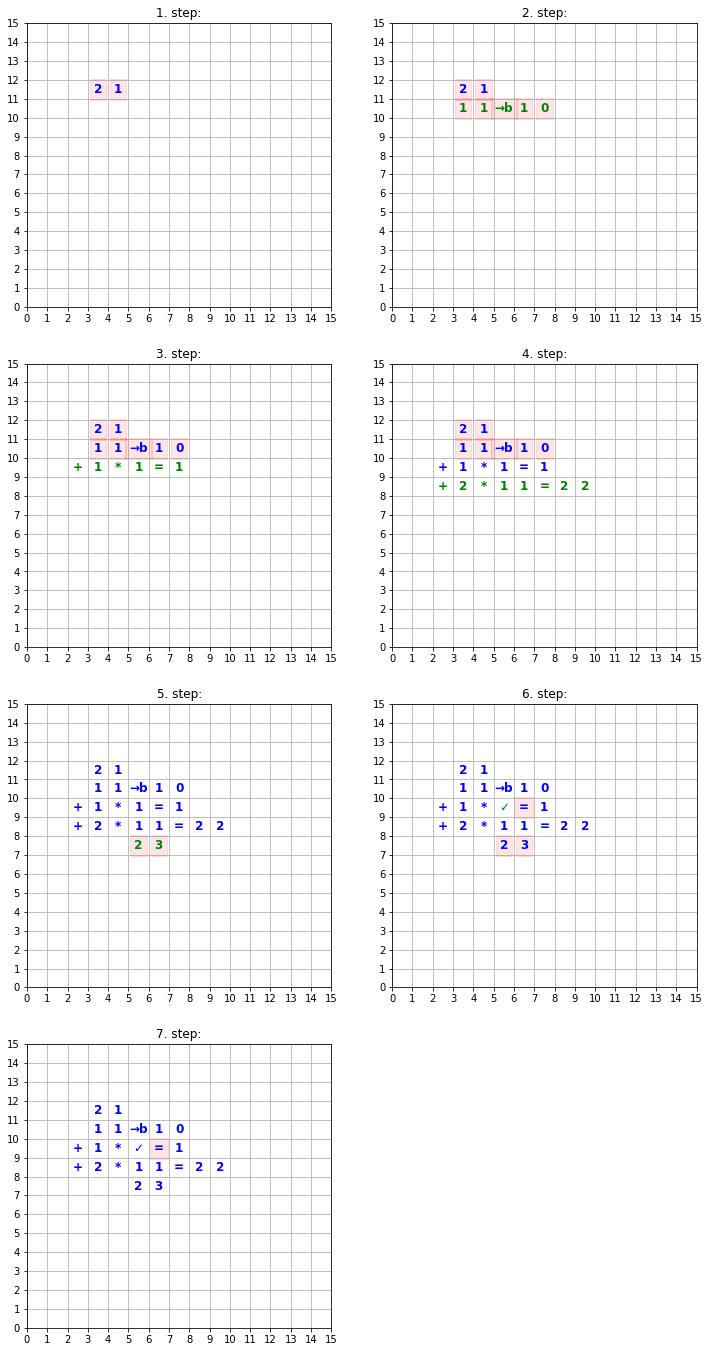

In [89]:
solve_base_conversion(23, 11)

# SubtractSolver

In [90]:
def sub_solver_gen(a=67, b=27):
    res = next(iter(SubtractSolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

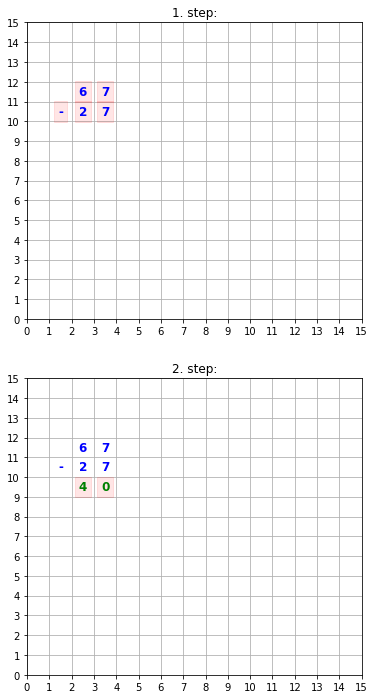

In [91]:
sub_solver_gen()

# IsDivisibleBy example

In [92]:
def divisible_solver_gen(a=10, b=5):
    res = next(iter(IsDivisibleBySolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

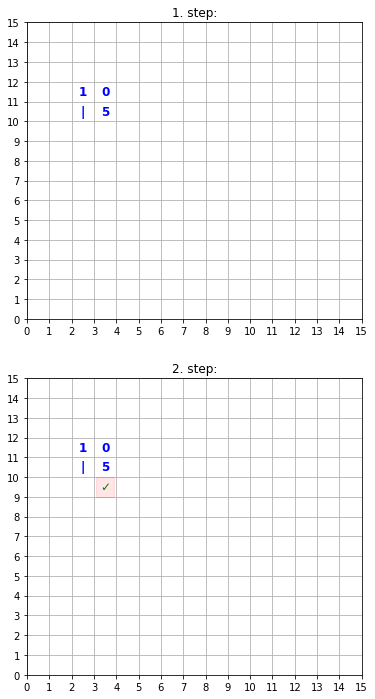

In [93]:
divisible_solver_gen()

# Factorize solver

In [94]:
def solve_factorize(n):
    res = next(iter(FactorizeSolver(15).generator(prime_generator(n))))
    plot_steps(res)

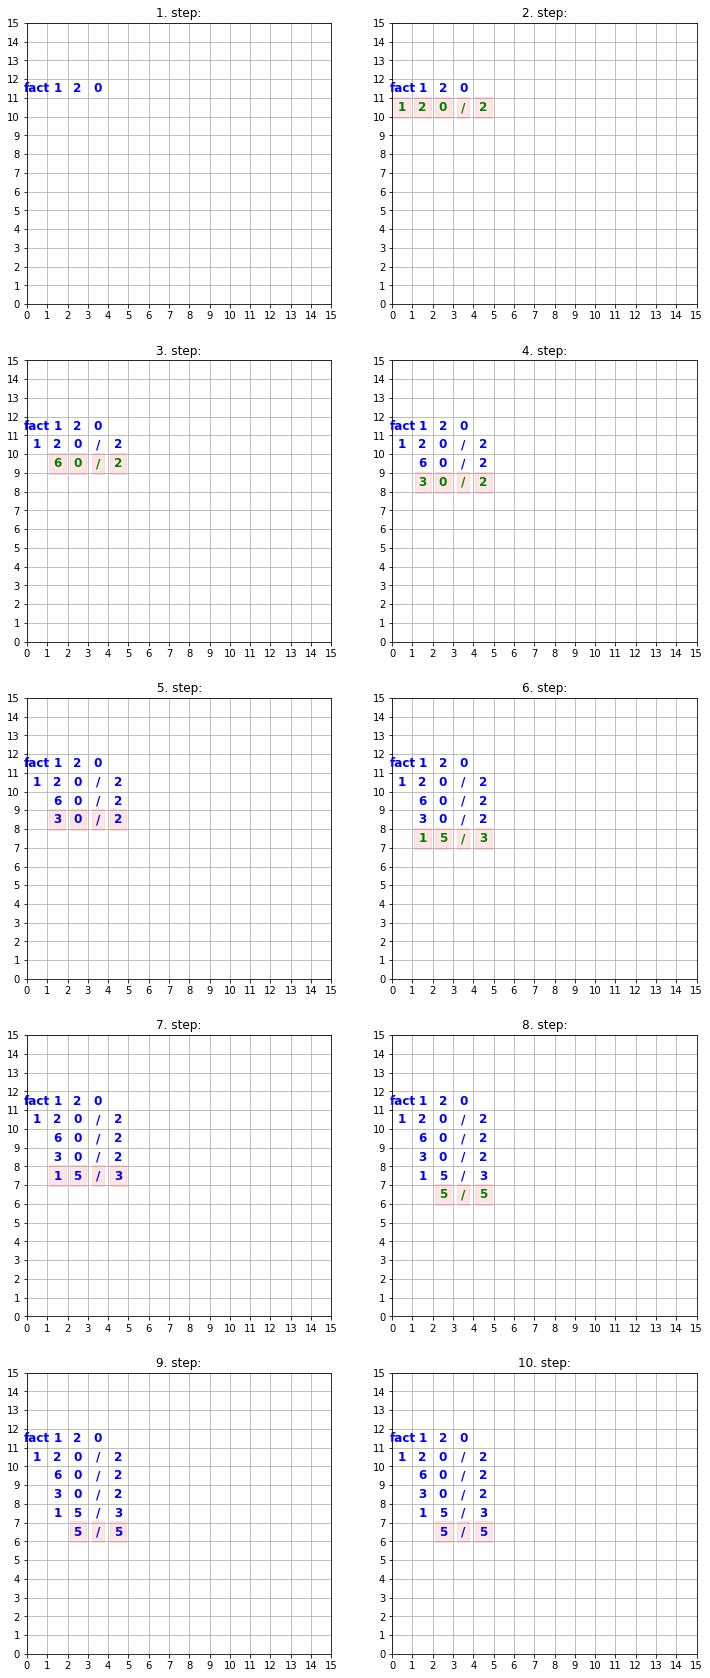

In [95]:
solve_factorize(120)

# Sort Solver

In [96]:
def list_generator():
    while True:
        yield {'ns': [ 69, 171,  96, 165, 147]}

In [103]:
def solve_sort():
    res = next(iter(SortSolver(15).generator(list_generator())))
    plot_steps(res)

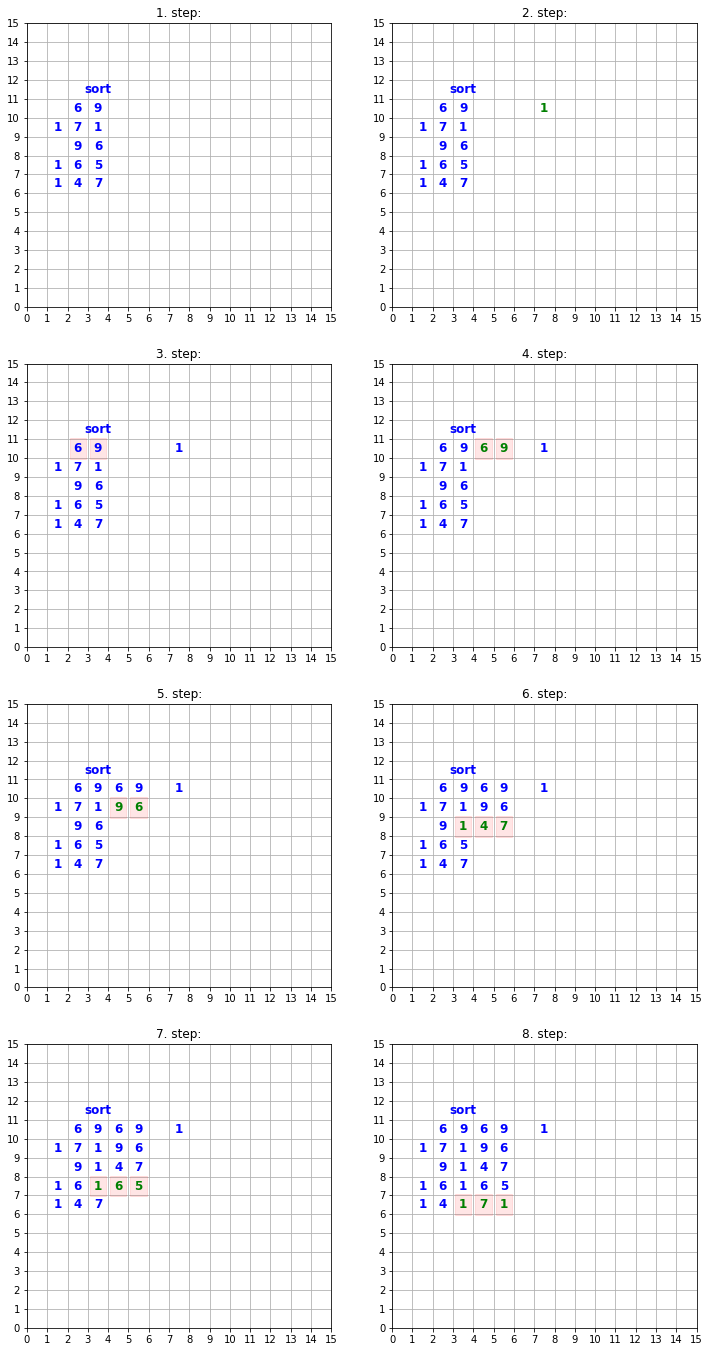

In [106]:
solve_sort()

# Multiplication Solver

In [109]:
def solve_multiplication(a=27, b=67):
    res = next(iter(MultiplySolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

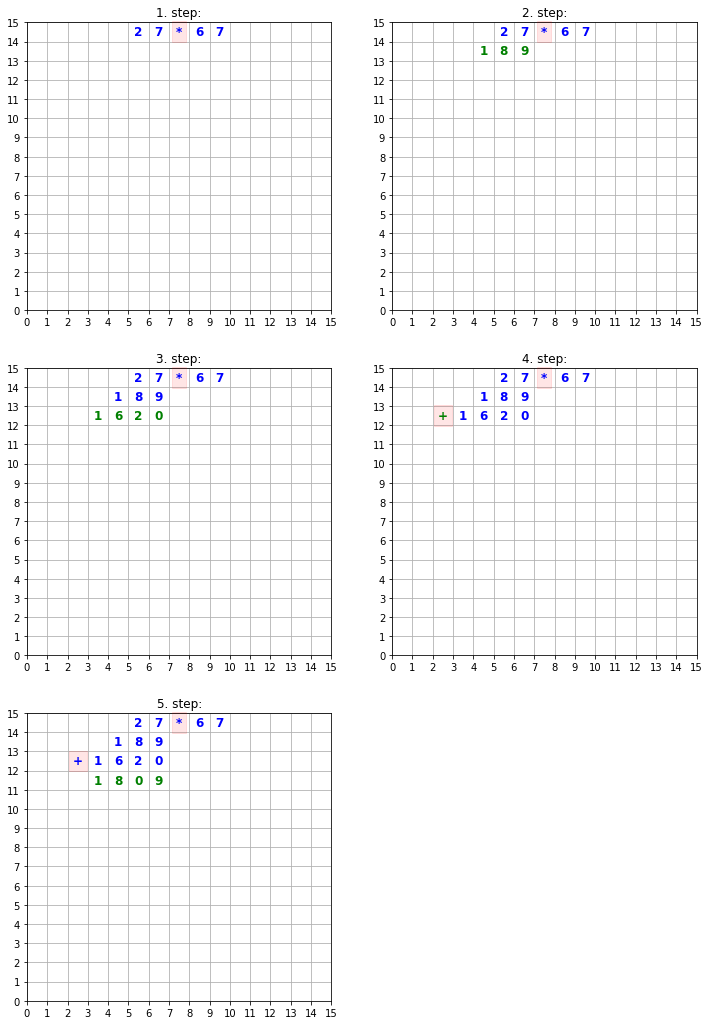

In [110]:
solve_multiplication()

# Pair comparison

In [112]:
def solve_pair_comparison(a=27, b=67):
    res = next(iter(P(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

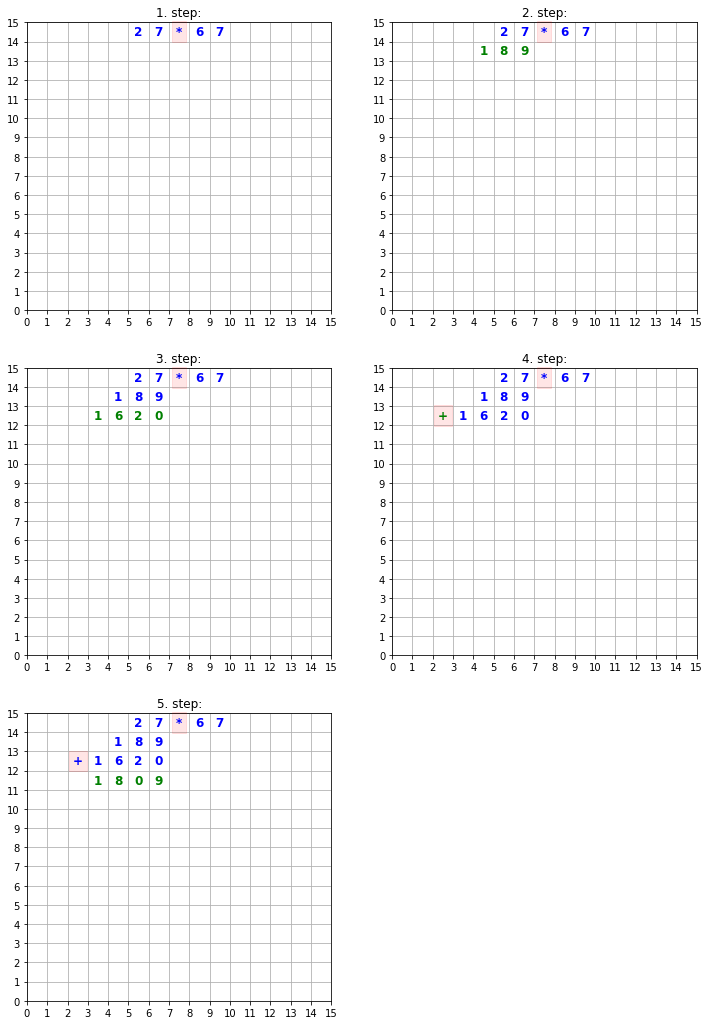

In [113]:
solve_pair_comparison()